In [118]:
import numpy as np
from EMD import EMD
from lpsolve55 import *
import matplotlib.pyplot as plt
from tools import generate_normal

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
P = [(1,4), (2,1), (9,3), (13, 2)]
Q = [(-1,2), (0,3), (5,4), (10, 1), (14,3), (15,1)]

In [4]:
d = lambda x,y: np.linalg.norm(x-y)

In [5]:
emd = EMD(P, Q, d)

In [6]:
emd.D

array([[  2.,   1.,   4.,   9.,  13.,  14.],
       [  3.,   2.,   3.,   8.,  12.,  13.],
       [ 10.,   9.,   4.,   1.,   5.,   6.],
       [ 14.,  13.,   8.,   3.,   1.,   2.]])

In [7]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [8]:
np

<module 'numpy' from '/Users/adib/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/__init__.pyc'>

In [9]:
lpsolve()

lpsolve  Python Interface version 5.5.0.10
using lpsolve version 5.5.2.5

Usage: ret = lpsolve('functionname', arg1, arg2, ...)


# Generate random dataset

In [2]:
m = 20
n = 28

In [127]:
P, Q = generate_normal(m, n, [1,1], [4,4])

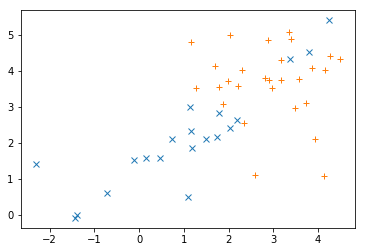

In [128]:
plt.plot(P_points[:,0],P_points[:,1], 'x')
plt.plot(Q_points[:,0],Q_points[:,1], '+')
plt.show()

In [129]:
d = lambda x,y: np.linalg.norm(x-y)

In [130]:
emd = EMD(P, Q, d)

In [131]:
emd.P[1]

(array([ 0.20801571,  1.01779564]), 3.4823872525811073)

## LP Solve toy example

In [45]:
lp = lpsolve('make_lp', 0, 4)
lpsolve('set_verbose', lp, IMPORTANT)
lpsolve('set_obj_fn', lp, [1, 3, 6.24, 0.1])
lpsolve('add_constraint', lp, [0, 78.26, 0, 2.9], GE, 92.3)
lpsolve('add_constraint', lp, [0.24, 0, 11.31, 0], LE, 14.8)
lpsolve('add_constraint', lp, [12.68, 0, 0.08, 0.9], GE, 4)
lpsolve('set_lowbo', lp, [28.6, 0, 0, 18])
lpsolve('set_upbo', lp, [Infinite, Infinite, Infinite, 48.98])
lpsolve('set_col_name', lp, ['COLONE', 'COLTWO', 'COLTHREE', 'COLFOUR'])
lpsolve('set_row_name', lp, ['THISROW', 'THATROW', 'LASTROW'])
lpsolve('write_lp', lp, 'a.lp')
print lpsolve('get_mat', lp)[0]

[[0.0, 78.26, 0.0, 2.9], [0.24, 0.0, 11.31, 0.0], [12.68, 0.0, 0.08, 0.9]]


In [38]:
print lpsolve('get_mat', lp, 1, 2)

78.26


In [41]:
lpsolve('solve', lp)
print lpsolve('get_objective', lp)
print lpsolve('get_variables', lp)[0]
print lpsolve('get_constraints', lp)[0]

31.7827586207
[28.6, 0.0, 0.0, 31.82758620689655]
[92.3, 6.864, 391.29282758620695]


## Computation of the Earth Mover Distance

In [138]:
emd.write_lp_problem('emd_pb.lp')

Done!


In [140]:
%%time
emd.solve_lp()

CPU times: user 608 µs, sys: 101 µs, total: 709 µs
Wall time: 799 µs


In [137]:
emd.distance

0.52220045692172345

In [141]:
emd.objective

51.610378296752046